In [27]:
import csv
import psycopg2

In [39]:
with open('/home/faculty/millbr02/pub/un-debates-augmented-1.csv', 'r', encoding='latin-1') as f:
    csv_iter = csv.reader(f)
    db = []
    for row in csv_iter:
        db.append(row)

    # complied list of country names
    ctryNames = []
    for entry in db[1:]:
        if entry[4] not in ctryNames:
            ctryNames.append(entry[4])

    # creating the matrix
    matrix = {x: {} for x in ctryNames}
    for country in matrix:
        matrix[country] = {x:0 for x in ctryNames}
    
    # populating the matrix
    for entry in db[1:]:
        for country in ctryNames:
            num = entry[3].count(country)
            othersMentioned = matrix.get(entry[4])
            othersMentioned[country] += num

    print(matrix)

{'Germany': {'Germany': 541, 'Barbados': 0, 'Egypt': 4, 'Latvia': 1, 'Kyrgyzstan': 0, 'Kazakstan': 0, 'Canada': 14, 'Greece': 2, 'Holy See (Vatican City State)': 0, 'Tajikistan': 0, 'Czechoslovakia': 7, 'Nigeria': 2, 'Iceland': 0, 'Libyan Arab Jamahiriya': 0, 'Austria': 0, 'East Timor': 3, 'Cuba': 1, 'Gabon': 0, 'Liechtenstein': 1, 'Argentina': 3, 'Panama': 0, 'Bhutan': 0, 'Syria': 41, 'Oman': 0, 'Saint Kitts and Nevis': 0, 'South Korea': 3, 'Saint Lucia': 0, 'Suriname': 0, 'Cape Verde': 1, 'Mexico': 4, 'Guinea': 2, 'Mali': 0, 'Montenegro': 0, 'Yugoslavia': 21, 'El Salvador': 1, 'Samoa': 0, 'Luxembourg': 3, 'Malawi': 0, 'Belgium': 0, 'Israel': 68, 'Laos': 1, 'Congo, The Democratic Republic of the': 0, 'France': 16, 'Dominican Republic': 0, 'Italy': 1, 'Qatar': 0, 'Seychelles': 1, 'Somalia': 15, 'Thailand': 1, 'Chile': 0, 'Democratic Yemen': 0, 'Albania': 2, 'South Africa': 63, 'Dominica': 0, 'Lithuania': 1, 'Sweden': 0, 'Bahamas': 0, 'Estonia': 1, 'Peru': 0, 'Fiji Islands': 0, 'Moldova

In [127]:
%matplotlib inline
import networkx as nx
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

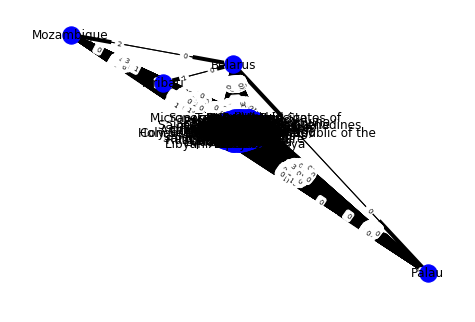

In [181]:
g = nx.MultiDiGraph()

for key in matrix:
    g.add_node(key)
    othersMentioned = matrix.get(key)
    for country in othersMentioned:
        g.add_edge(key,country,length=othersMentioned[country])

pos = nx.spring_layout(g,scale=100)
nx.draw(g,pos,node_color='b',with_labels = True)
edge_labels = dict([((u,v,),d['length']) for u,v,d in g.edges(data=True)])
nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels,label_pos=0.3,font_size= 7)
plt.figure(num=None, figsize=(20,20), dpi=1500)
plt.show()

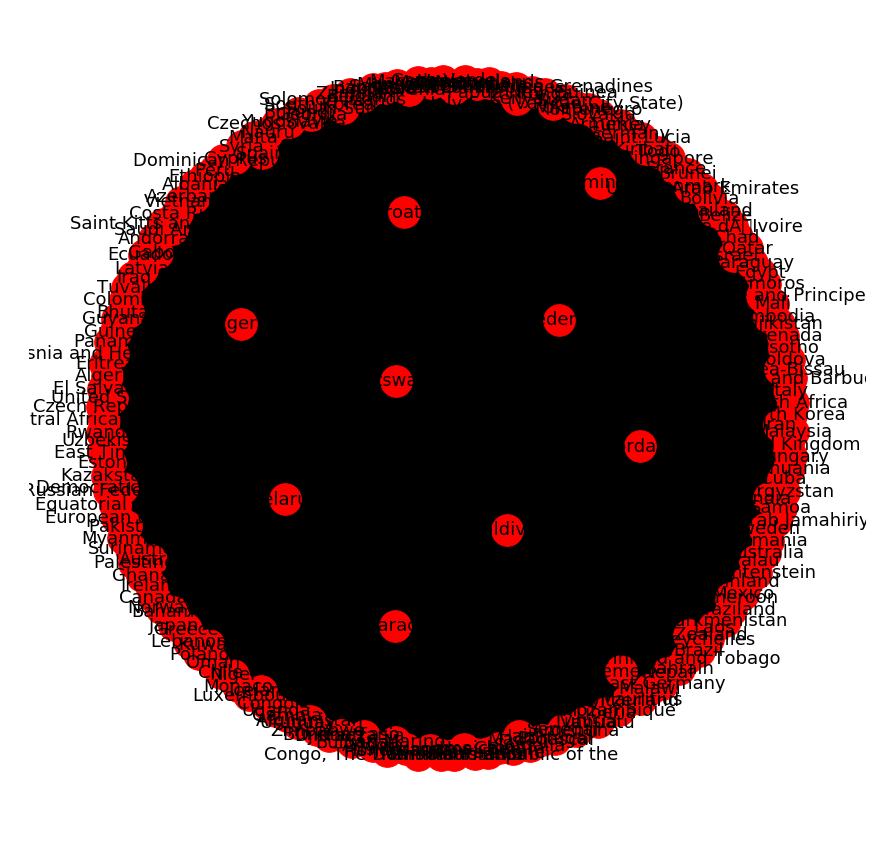

In [185]:
g = nx.MultiDiGraph()

for key in matrix:
    g.add_node(key)
    othersMentioned = matrix.get(key)
    for country in othersMentioned:
        g.add_edge(key,country,length=othersMentioned[country])

gfig, gax = plt.subplots(figsize=(15,15))
hego = nx.ego_graph(g,'United States',radius=2)
pos = nx.spring_layout(hego,k=20*1/math.sqrt(len(matrix.keys())),scale=8.0,center=(0,0))
nx.draw(g,pos,ax=gax,node_size=1000,with_labels=True,font_size=18)